In [1]:
# Lousin Babayan
# Ensemble Models

In [2]:
# 1 Data Source and Contents

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import time

In [3]:
# Data cleaning - as done in CA03

In [4]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [5]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [6]:
# check for null or missing values
missing_values = df.isnull().sum()
missing_values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [7]:
# Outliers
stat = df.y.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR

count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64


In [8]:
lower_outlier = df['y'] < lower
lower_outlier.sum()

0

In [9]:
upper_outlier = df['y'] > upper
upper_outlier.sum()

11687

In [10]:
df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

In [11]:
# Ca03
for column in df.drop(columns=["flag","y"]):   
    df[column] = df[column].str.split(".", n=1, expand = True)[1]

In [12]:
# train and test data 
train=df[df['flag']=='train']
test=df[df['flag']=='test']     

In [13]:
# CA03 Testing and Training Data
xtrain = pd.get_dummies(train[['hours_per_week_bin','occupation_bin','msr_bin',
                                     'capital_gl_bin','race_sex_bin','education_bin','age_bin']], drop_first=True)
xtest = pd.get_dummies(test[['hours_per_week_bin','occupation_bin','msr_bin',
                                     'capital_gl_bin','race_sex_bin','education_bin','age_bin']], drop_first=True)

In [14]:
ytrain=train['y']
ytest=test['y']

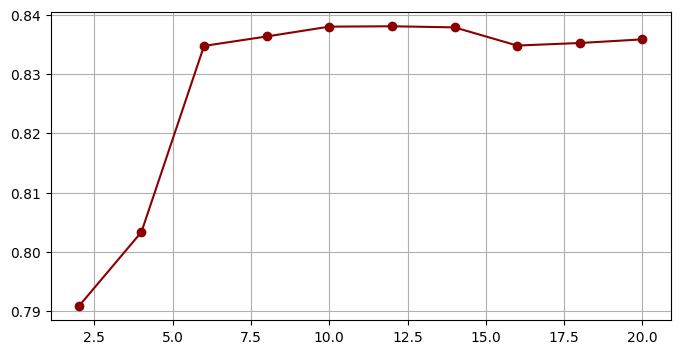

In [15]:

results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(xtrain, ytrain)
  y_pred = model.predict(xtest)
  accuracy = np.mean(ytest==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred',marker='o', grid=True)
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

accuracytest = []
auctest = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=101)
    model.fit(xtrain,ytrain)

# prediction
    ypred = model.predict(xtest)
    yprob = model.predict_proba(xtest)[:, 1]

# accuracy and AUC
    accuracy = accuracy_score(ytest, ypred)
    auc = roc_auc_score(ytest, yprob)

    accuracytest.append(accuracy)
    auctest.append(auc)

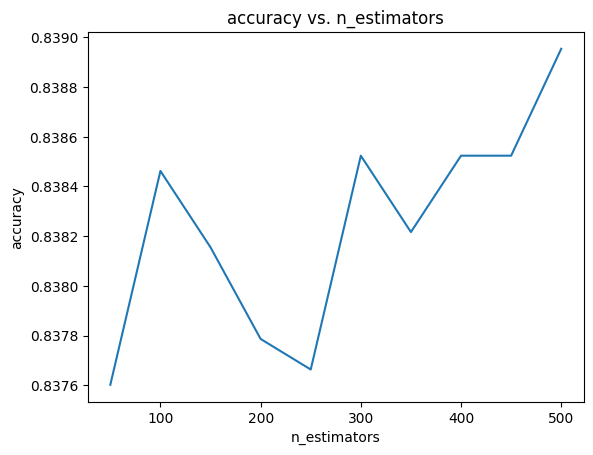

In [18]:
# plot accuracy 
plt.plot(n_estimators, accuracytest)
plt.title("accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()


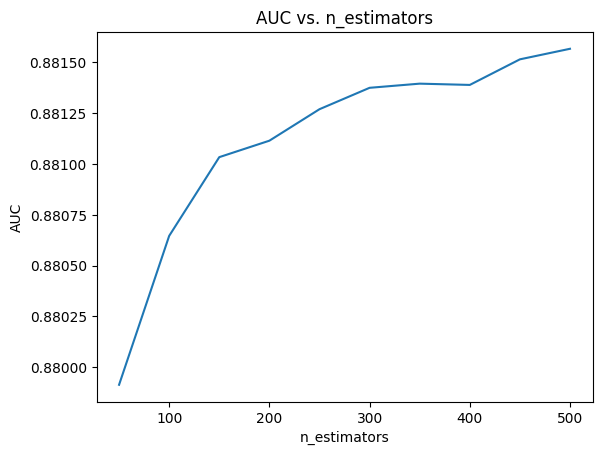

In [19]:
# plot auc
plt.plot(n_estimators, auctest)
plt.title("AUC vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.show()

In [23]:
# Question 1

# We see a spike in accuracy at 100 and then an immediate decline.
# After 250 we see a gradual incline in accuracy. 
# For AUC we see a constant upwary trend. 

# Question 2 

# The optimal value may be 500 where both accuracy and auc are at the highest.

In [20]:
# 4 Building AdaBoost, Gradient Boost and XGB

In [21]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier
accuracy_adaboost = []
auc_adaboost = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimators:
    model = AdaBoostClassifier(n_estimators = n, random_state =101)
    model.fit(xtrain,ytrain)

# prediction
    ypred = model.predict(xtest)
    yprob = model.predict_proba(xtest)[:, 1]

# accuracy and AUC
    accuracy = accuracy_score(ytest, ypred)
    auc = roc_auc_score(ytest, yprob)

    accuracy_adaboost.append(accuracy)
    auc_adaboost.append(auc)


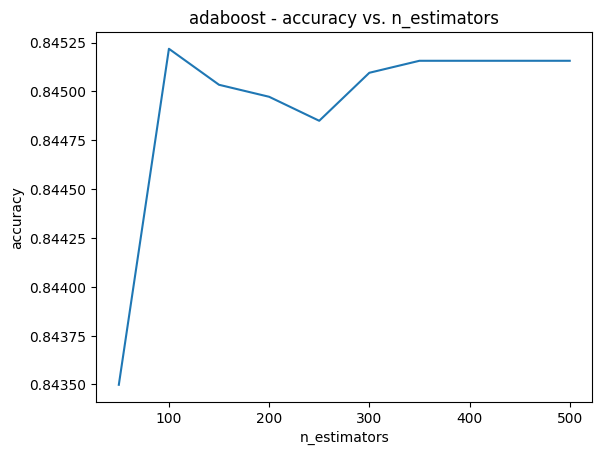

In [22]:
# plot accuracy 
plt.plot(n_estimators, accuracy_adaboost)
plt.title("adaboost - accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

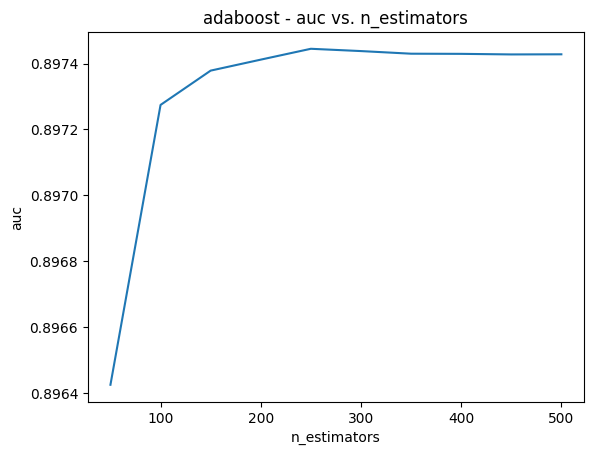

In [24]:
# plot auc
plt.plot(n_estimators, auc_adaboost)
plt.title("adaboost - auc vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("auc")
plt.show()

In [28]:
# Question 1

# We see a spike in accuracy at 100 and then a plateau.
# AUC and accuracy follow a similar trend.
# Question 2 

# The optimal value may be at 100 where the instant spike is.

In [31]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

accuracy_gradient = []
auc_gradient = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimators:
    model = GradientBoostingClassifier(n_estimators = n, random_state =101)
    model.fit(xtrain,ytrain)

# prediction
    ypred = model.predict(xtest)
    yprob = model.predict_proba(xtest)[:, 1]

# accuracy and AUC
    accuracy = accuracy_score(ytest, ypred)
    auc = roc_auc_score(ytest, yprob)

    accuracy_gradient.append(accuracy)
    auc_gradient.append(auc)

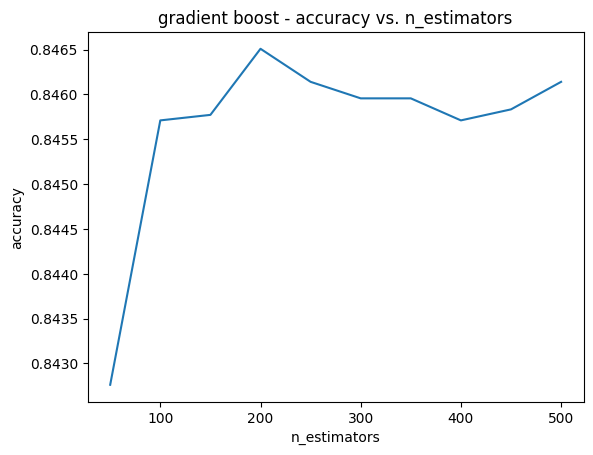

In [32]:
# plot accuracy 
plt.plot(n_estimators, accuracy_gradient)
plt.title("gradient boost - accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

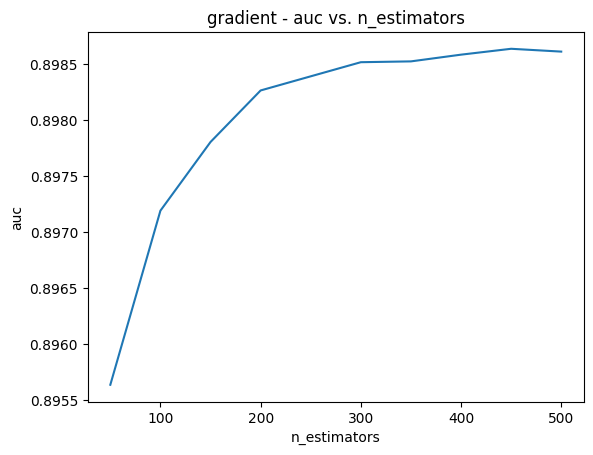

In [33]:
# plot auc
plt.plot(n_estimators, auc_gradient)
plt.title("gradient - auc vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("auc")
plt.show()

In [38]:
# Question 1

# We see a spike in accuracy at 100 and then again at 200 and then a slight plateau. 
# For AUC we see see a steady increase and then plateaul. 
# Question 2 

# The optimal value may be at 400 or 500. 

In [35]:
from xgboost import XGBClassifier as xgb
accuracy_xgb = []
auc_xgb = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for n in n_estimators:
    model = xgb(n_estimators=n, random_state=101)
    model.fit(xtrain, ytrain)

    # prediction
    ypred = model.predict(xtest)
    yprob = model.predict_proba(xtest)[:, 1]

    # accuracy and AUC
    accuracy = accuracy_score(ytest, ypred)
    auc = roc_auc_score(ytest, yprob)
    
    # Append the results to the lists
    accuracy_xgb.append(accuracy)
    auc_xgb.append(auc)
    

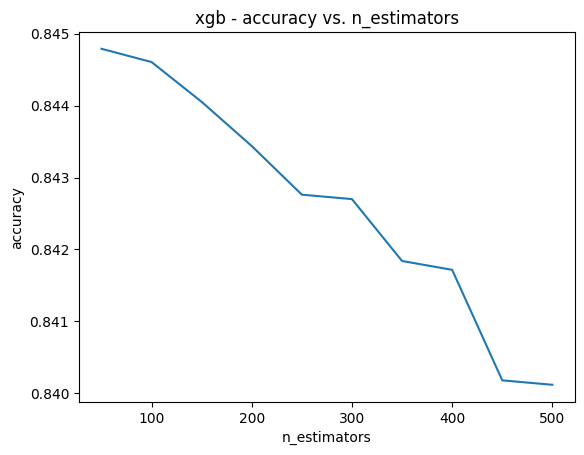

In [36]:
# plot accuracy 
plt.plot(n_estimators, accuracy_xgb)
plt.title("xgb - accuracy vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

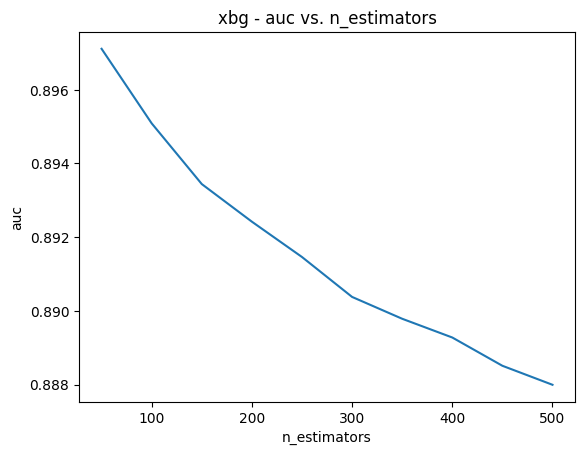

In [37]:
# plot auc
plt.plot(n_estimators, auc_xgb)
plt.title("xbg - auc vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("auc")
plt.show()

In [39]:
# Question 1

# We see a constant decline for both accuracy and AUC.

# Question 2 

# The optimal value may be at 100 because there is a constant decrease after. 

In [41]:
# 5 Compare Performance

performance = pd.DataFrame({
    'Random Forest':[max(accuracytest), max(auctest)],
    'AdaBoost': [max(accuracy_adaboost),max(auc_adaboost)],
    'Gradient Boost': [max(accuracy_gradient),max(auc_gradient)],
    'XGB':[max(accuracy_xgb),max(auc_xgb)]},
    index = ['Accuracy','AUC']
    )
performance

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838953,0.845218,0.846508,0.844788
AUC,0.881566,0.897445,0.898634,0.897111
